In [12]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [38]:
test_data = pd.read_csv('NIOBRARA_Clean.csv')

In [13]:
test_data = pd.read_csv('CODL_Well_Tops_Kriging.txt')



In [14]:
test_data.describe()

,X,Y,Z
count,2.915600e+04,29156.000000,29156.000000
mean,9.224872e+05,274110.401000,4365.458144
std,1.706077e+05,128171.032006,2240.775141
min,6.284872e+05,53610.401000,-951.237138
25%,7.754872e+05,163860.401000,2645.953307
50%,9.224872e+05,274110.401000,4486.258573
75%,1.069487e+06,384360.401000,6223.537385
max,1.216487e+06,494610.401000,9263.941098


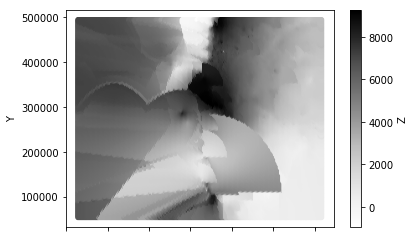

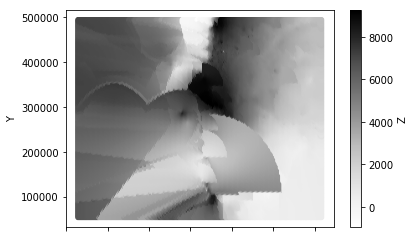

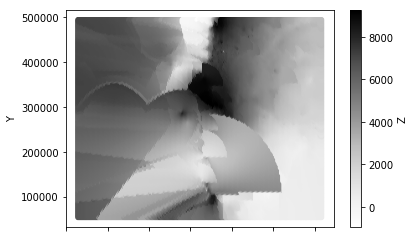

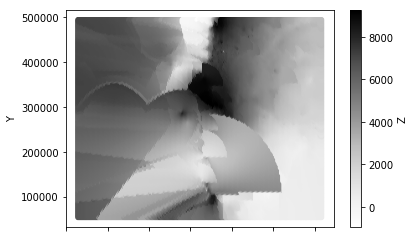

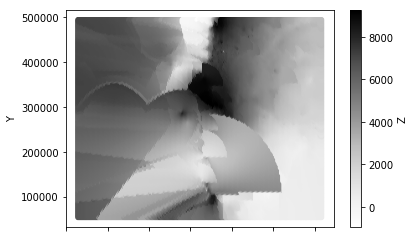

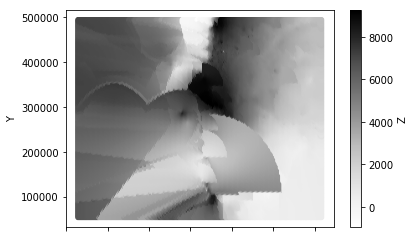

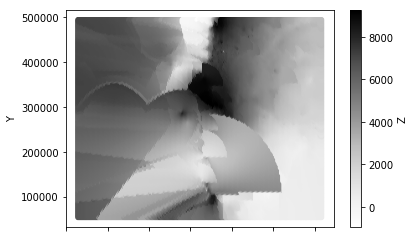

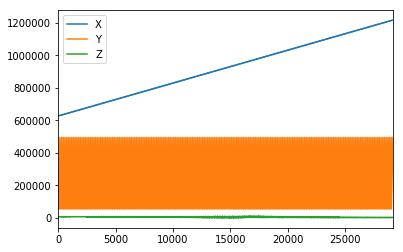

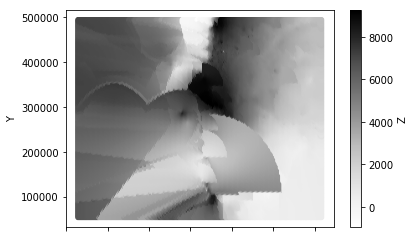

KeyboardInterrupt: 

In [25]:
df = pd.DataFrame(test_data, columns=['X', 'Y', 'Z'])
cX = df['X']
cY = df['Y']
cZ = df['Z']
plt.scatter(cX, cY, c = cZ)
plt.show()

In [39]:
data_stat = test_data.describe()
data_stat.iloc[0,:]

tm_depth       44651.0
lat            44651.0
long           44651.0
ground_elev    44651.0
Name: count, dtype: float64

In [40]:
selected_features = ['tm_depth', 'lat', 'long', 'ground_elev']
selected_data = test_data[selected_features]
selected_data.dropna(inplace=True)

In [41]:
selected_features_for_ML = ['lat', 'long', 'ground_elev']


# Separating Features/Input (X) and Target/Output (y)

X = selected_data[selected_features_for_ML]
y = selected_data['tm_depth']

# Split data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


# ------------------------------------
# Linear Regression Model
# ------------------------------------
from sklearn.linear_model import LinearRegression
# Instantiate model
linreg = LinearRegression()
# Fit Model
linreg.fit(X_train, y_train)
# Predict
y_pred = linreg.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Linear Regression RMS Error:', RMSE)


# ------------------------------------
# Random Forest Model
# ------------------------------------
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
rfreg = RandomForestRegressor(n_estimators=500, random_state=1)
# Fit Model
rfreg.fit(X_train, y_train)
# Predict
y_pred = rfreg.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Random Forest Regression RMS Error:', RMSE)


# ------------------------------------
# XGBoost Regresoor Model
# ------------------------------------
import xgboost as xgb
# Instantiate model
xgb = xgb.XGBRegressor(n_estimators=300, max_depth=9, learning_rate=0.1)
# Fit Model
xgb.fit(X_train, y_train)
# Predict
y_pred = xgb.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('XGBoost Regression RMS Error:', RMSE)


Linear Regression RMS Error: 1275.5052911
Random Forest Regression RMS Error: 728.903696722
XGBoost Regression RMS Error: 731.473854796


# Second Run (Predicting NIOBRARA by the help of PIERRE) 

In [42]:
test_data2 = pd.read_csv('NIOBRARA_Clean.csv')
test_data3 = pd.read_csv('PIERRE_Clean.csv')

#Read PIERRE columns
selected_features = ['tm_depth', 'lat', 'long', 'ground_elev']
selected_data = test_data3[selected_features]
selected_data.dropna(inplace=True)

C:\Users\mohse\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [43]:
#First predict PIERRE
print('Predicting PIERRE')
selected_features_for_ML = ['lat', 'long', 'ground_elev']


# Separating Features/Input (X) and Target/Output (y)

X = selected_data[selected_features_for_ML]
y = selected_data['tm_depth']

# Split data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


# ------------------------------------
# Linear Regression Model
# ------------------------------------
from sklearn.linear_model import LinearRegression
# Instantiate model
linreg = LinearRegression()
# Fit Model
linreg.fit(X_train, y_train)
# Predict
y_pred1 = linreg.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
print('Linear Regression RMS Error:', RMSE)


# ------------------------------------
# Random Forest Model
# ------------------------------------
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
rfreg = RandomForestRegressor(n_estimators=500, random_state=1)
# Fit Model
rfreg.fit(X_train, y_train)
# Predict
y_pred2 = rfreg.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))

print('Random Forest Regression RMS Error:', RMSE)


# ------------------------------------
# XGBoost Regresoor Model
# ------------------------------------
import xgboost as xgb
# Instantiate model
xgb = xgb.XGBRegressor(n_estimators=300, max_depth=9, learning_rate=0.1)
# Fit Model
xgb.fit(X_train, y_train)
# Predict
y_pred3 = xgb.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))

print('XGBoost Regression RMS Error:', RMSE)
print('Predicting NIOBRARA with the help of PIERRE-------------------------')


selected_features = ['tm_depth', 'lat', 'long', 'ground_elev']
selected_data = test_data2[selected_features]+test_data3['tm_depth']
selected_data.dropna(inplace=True)


# Separating Features/Input (X) and Target/Output (y)

X = selected_data[selected_features_for_ML]
y = selected_data['tm_depth']

# Split data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


# ------------------------------------
# Linear Regression Model
# ------------------------------------
from sklearn.linear_model import LinearRegression
# Instantiate model
linreg = LinearRegression()
# Fit Model
linreg.fit(X_train, y_train)
# Predict
y_pred = linreg.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Linear Regression RMS Error:', RMSE)


# ------------------------------------
# Random Forest Model
# ------------------------------------
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
rfreg = RandomForestRegressor(n_estimators=500, random_state=1)
# Fit Model
rfreg.fit(X_train, y_train)
# Predict
y_pred = rfreg.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Random Forest Regression RMS Error:', RMSE)


# ------------------------------------
# XGBoost Regresoor Model
# ------------------------------------
import xgboost as xgb
# Instantiate model
xgb = xgb.XGBRegressor(n_estimators=300, max_depth=9, learning_rate=0.1)
# Fit Model
xgb.fit(X_train, y_train)
# Predict
y_pred = xgb.predict(X_test)
# Calculate RMS Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('XGBoost Regression RMS Error:', RMSE)


Predicting PIERRE
Linear Regression RMS Error: 1074.59012971
Random Forest Regression RMS Error: 736.575619924
XGBoost Regression RMS Error: 756.741509451
Predicting NIOBRARA with the help of PIERRE-------------------------


C:\Users\mohse\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3033: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


ValueError: Found array with 0 sample(s) (shape=(0, 3)) while a minimum of 1 is required.